In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (Condition on trial type)
#### Load data and check data head
##### Use all.csv

In [7]:
# Load data from csv file into a NumPy structured array
data2C = hddm.load_csv('./rt_dataframes/all.csv')
data2C.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [8]:
data2C = data2C.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data2C['rt'] = data2C['rt'] / 1000
data2C.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


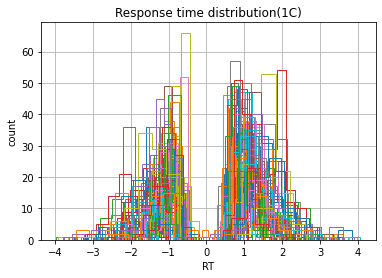

In [9]:
#flip the error RTs to be negative
data2C = hddm.utils.flip_errors(data2C)
# plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(1C)')
for i, subj_data in data2C.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(1C).png')

## Fitting the hierarchical model for one condition with no subject effects

In [10]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data2C, depends_on={'z': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname=f'./fitting_results/HDDM/HDDM2C/traces2c(z_trial).db', db='pickle')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1994.5 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(101)
Plotting z(102)
Plotting z_std


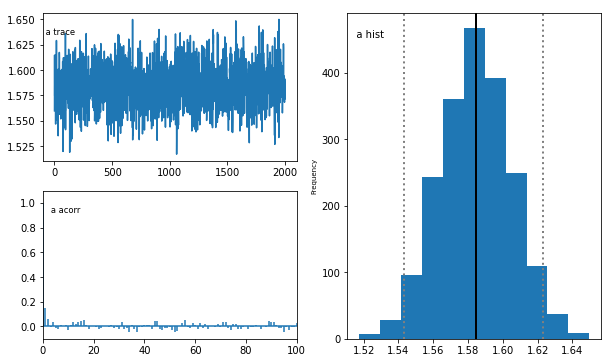

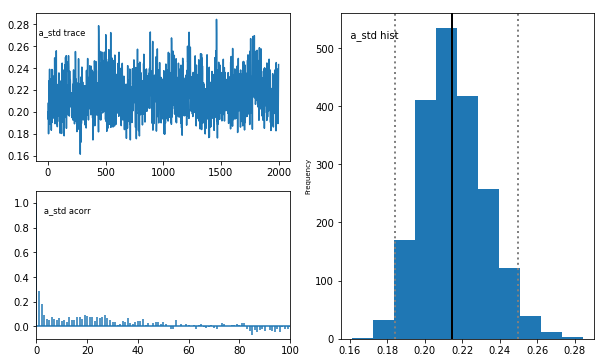

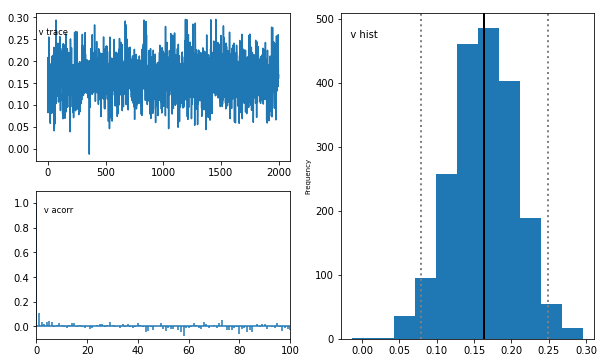

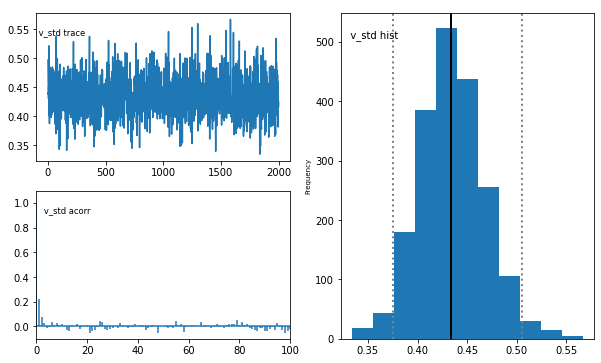

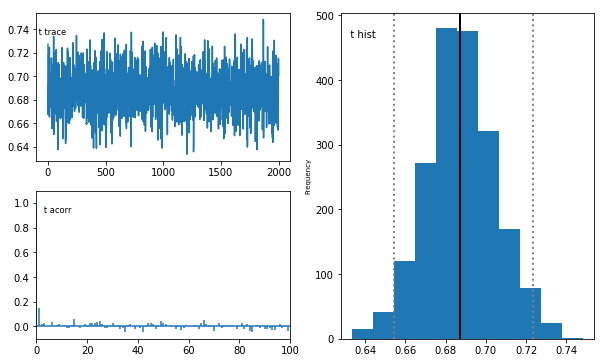

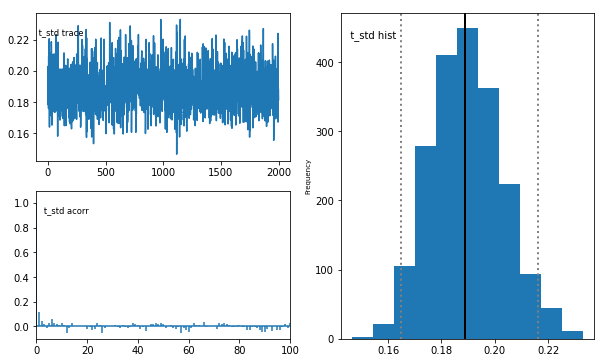

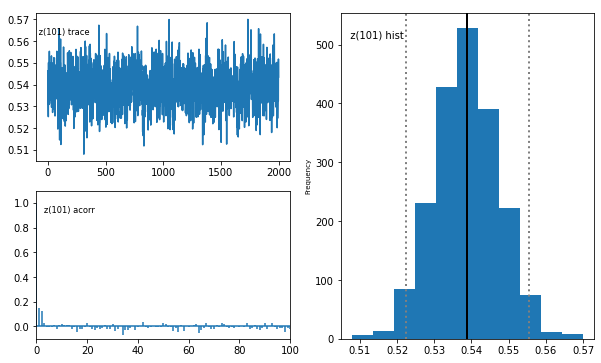

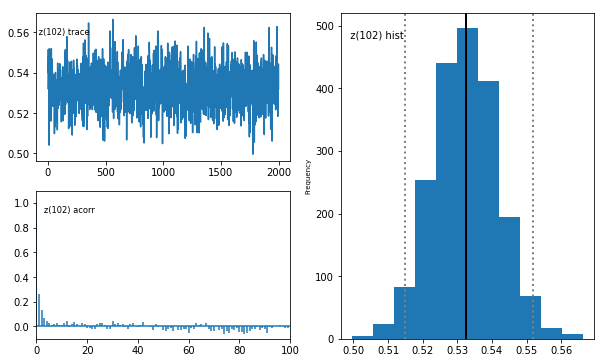

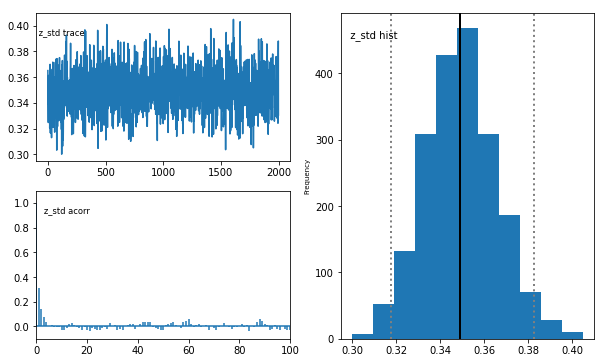

In [11]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [12]:
stats2Cz = m.gen_stats()
stats2Cz.to_csv('./fitting_results/HDDM/HDDM2C/HDDM2Cz.csv', sep=',')
stats2Cz[stats2Cz.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.58417,0.020765,1.54379,1.56984,1.58437,1.59848,1.62474,0.000571239
a_std,0.215607,0.0171168,0.185744,0.203244,0.214379,0.226435,0.25185,0.000652561
v,0.163457,0.0430793,0.0776387,0.134772,0.163771,0.192094,0.247666,0.00125099
v_std,0.435059,0.0331942,0.373191,0.413447,0.433465,0.456198,0.502921,0.000959629
t,0.68772,0.0173323,0.653414,0.676415,0.687347,0.698705,0.723027,0.000479503
t_std,0.18956,0.0133538,0.165457,0.179982,0.188975,0.198726,0.218039,0.000360333
z_std,0.349414,0.0163493,0.318185,0.3383,0.348999,0.360101,0.384044,0.00055787


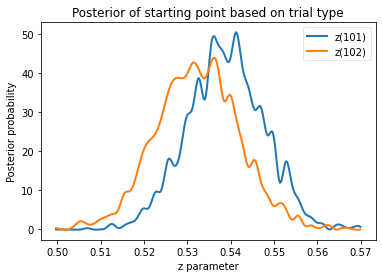

In [13]:
z_101, z_102 = m.nodes_db.node[['z(101)', 'z(102)']]
hddm.analyze.plot_posterior_nodes([z_101, z_102])
plt.xlabel('z parameter')
plt.ylabel('Posterior probability')
plt.title('Posterior of starting point based on trial type')
plt.savefig('./fitting_results/HDDM/HDDM2C/posterior_a(101,102).png')

In [14]:
print("P(z(101) > z(102)) = ", (z_101.trace() > z_102.trace()).mean())

P(z(101) > z(102)) =  0.6935


In [15]:
m.dic 

31805.766943345192

## Check for Model convergence

In [8]:
# Set up models list to append results
models2Cz = list()

In [9]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C/chain2Cz_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C/chain2CzCON_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [10]:
num_chains = 5
data_chains = [(data2C,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2Cz = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 2Fitting chain 3Fitting chain 0Fitting chain 1Fitting chain 4






/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------96%----------------  ] 2881 of 3000 complete in 1032.0 sec              0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 3 of 3000 complete in 0.7 sec [                  0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec [                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec [                  0%                  ] 5 of 3000 complete in 1.4 sec  [                  0%                  ] 7 of 3000 complete in 2.2 sec[                  0%                  ] 7 of 3000 complete in 2.2 sec[                  0%                  ] 7 of 3000 complete in 2.2 sec [                  0%                  ] 7 of 3000 complete in 2.2 sec[                  0%                  ] 9 of 3000 complete in 2.9 sec[            

In [11]:
models2Cz

In [12]:
results = hddm.analyze.gelman_rubin(models2Cz)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0022363524966384
a_std: 1.0015472253160065
a_subj.00aa64fdcb675341: 1.0008036961833742
a_subj.02535fcf7e16bb56: 1.0052574681633621
a_subj.06c46b112368babf: 1.0002288829684147
a_subj.09ba82a2ca814481: 1.0002856347108215
a_subj.0abfc32a4d12c731: 1.000169058702831
a_subj.0b0a94c202d0b233: 1.000668031047697
a_subj.0beac20378edac7b: 1.0003351667301639
a_subj.0d894551bc966608: 1.0007381753291222
a_subj.10d15198ac61a404: 0.9999363099343497
a_subj.12a096342c4d052f: 1.000762430934194
a_subj.13e347e32a454872: 0.9998864708422591
a_subj.15e0c065b2c11595: 1.0005391674007753
a_subj.163b12703c8e5c3c: 1.000624453150462
a_subj.1bf86ff948486447: 1.0002532489787161
a_subj.1cb976bac3a2016b: 0.9999595862316218
a_subj.1ffdcfc59b83c43a: 1.0000871458782639
a_subj.221e9f16c114b2c0: 1.0002700256216936
a_subj.22d84796012679e8: 1.000996977305901
a_subj.247384e4eccc4f80: 1.000236186397241
a_subj.2737c4b829b3018f: 1.0005497695531278
a_subj.27902f23b60a7b76: 0.9999498988893265
a_subj.279cd1540fc8f71f: 1.0001670

In [13]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'a_subj.296a71628065dfa8': 1.668552188070084, 'v_subj.296a71628065dfa8': 1.198699235940266, 't_subj.296a71628065dfa8': 2.0396332184082047, 'z_subj_trans.296a71628065dfa8': 1.4515591056212176}

Values smaller than the threshold:
{}


In [1]:
m.plot_posterior_predictive(figsize=(50, 70))

NameError: name 'm' is not defined